<a href="https://colab.research.google.com/github/mirjamdebruin/mirjamdebruin.github.io/blob/master/Aerosol_diameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize
from tqdm import tqdm

In [0]:
l = 0.0674; #mean free path (um), air at 293 K and 101.3 kPa
a = 1.142; #for solids
b = 0.558; #for solids
d_m = 1;
gamma = 0.999; #for solids
rho_0 = 1;
c_c_dm = 1.15399;

In [0]:
def guess_d_ve(d_m: float, initial_estimate=.1) -> float:
  """Give best estimate for d_ve given some d_m."""
  function_to_minimize = lambda d_ve: d_m / (1 + (2*l/d_m)*(a + b * np.exp( -gamma/(2*l/d_m) ) )) - d_ve * chi / ( 1 + (2*l/d_ve)*(a + b * np.exp( -gamma/(2*l/d_ve))))
  x = scipy.optimize.fsolve(function_to_minimize, initial_estimate)
  return x

def guess_d_a(d_m: float, initial_estimate=.1) -> float:
  """Give best estimate for d_a given some d_m or d_v."""
  d_ve = guess_d_ve(d_m, initial_estimate)

  function_to_minimize = lambda d_a: d_ve * np.sqrt( (1/chi) * (rho/rho_0) * (1+(2*l/d_ve) * (a+b*np.exp(-gamma/(2*l/d_ve)) )) / (1+(2*l/d_a) * (a+b*np.exp(-gamma/(2*l/d_a)) ))) - d_a
  x = scipy.optimize.fsolve(function_to_minimize, initial_estimate)
  return x

# NaCl

In [0]:
chi = 1.2; # for NaCl
rho = 2.16; #g/mL for NaCl

In [6]:
df_dve = pd.DataFrame([dict(d_m=d_m, d_ve=guess_d_ve(d_m, initial_estimate=d_m)[0]) for d_m in np.arange(.01, 3, .01)])
p = np.polyfit(df_dve['d_m'], df_dve['d_ve'], 1)
print(f'Line fitted: {p[0]}*d_ve + {p[1]}')

df_da = pd.DataFrame([dict(d_m=d_m, d_a=guess_d_a(d_m, initial_estimate=d_m)[0]) for d_m in np.arange(.01, 3, .01)])
p = np.polyfit(df_da['d_m'], df_da['d_a'], 1)
print(f'Line fitted: {p[0]}*d_a + {p[1]}')

Line fitted: 0.8375653306682206*d_ve + 0.01299579611009891
Line fitted: 1.1249288267024937*d_a + 0.04018699371761823


Text(0, 0.5, 'd_ve/d_a')

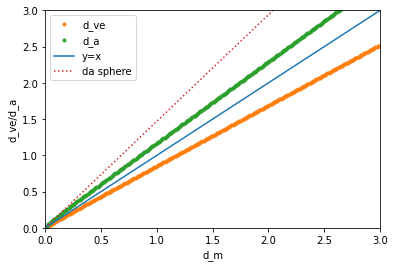

In [7]:
ax = df_dve.plot('d_m', 'd_ve', marker='.', ls='', color='C1', legend='dve')
df_da.plot('d_m', 'd_a', marker='.', ls='', color='C2', legend='da', ax=ax)
plt.plot([0, 3], [0,3], label='y=x')
plt.plot([0, 3], [0, 3*np.sqrt(rho)], color='C3', label='da sphere', ls=':')
plt.legend()
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.ylabel('d_ve/d_a')

# Glucose

In [0]:
chi = 1.03; # for NaCl
rho = 1.54; #g/mL for NaCl

In [9]:
df_dve = pd.DataFrame([dict(d_m=d_m, d_ve=guess_d_ve(d_m, initial_estimate=d_m)[0]) for d_m in np.arange(.01, 3, .01)])
p = np.polyfit(df_dve['d_m'], df_dve['d_ve'], 1)
print(f'Line fitted: {p[0]}*d_ve + {p[1]}')

df_da = pd.DataFrame([dict(d_m=d_m, d_a=guess_d_a(d_m, initial_estimate=d_m)[0]) for d_m in np.arange(.01, 3, .01)])
p = np.polyfit(df_da['d_m'], df_da['d_a'], 1)
print(f'Line fitted: {p[0]}*d_a + {p[1]}')

Line fitted: 0.971605850699996*d_ve + 0.0023264293013242807
Line fitted: 1.1888477631324976*d_a + 0.017708866113764394


Text(0, 0.5, 'd_ve/d_a')

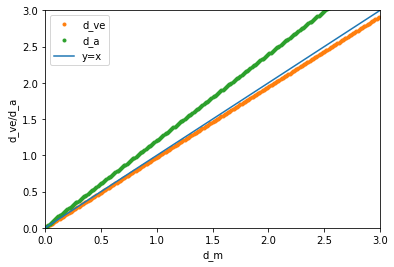

In [10]:
ax = df_dve.plot('d_m', 'd_ve', marker='.', ls='', color='C1', legend='d_ve')
df_da.plot('d_m', 'd_a', marker='.', ls='', color='C2', legend='d_a', ax=ax)
plt.plot([0, 3], [0,3], label='y=x')
plt.legend()
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.ylabel('d_ve/d_a')

# Toy example

In [0]:
chi = 1
rho = 1.54; #g/mL for NaCl

In [12]:
df_dve = pd.DataFrame([dict(d_m=d_m, d_ve=guess_d_ve(d_m, initial_estimate=d_m)[0]) for d_m in np.arange(.01, 3, .01)])
p = np.polyfit(df_dve['d_m'], df_dve['d_ve'], 1)
print(f'Line fitted: {p[0]}*d_ve + {p[1]}')

df_da = pd.DataFrame([dict(d_m=d_m, d_a=guess_d_a(d_m, initial_estimate=d_m)[0]) for d_m in np.arange(.01, 3, .01)])
p = np.polyfit(df_da['d_m'], df_da['d_a'], 1)
print(f'Line fitted: {p[0]}*d_a + {p[1]}')

Line fitted: 0.9999999999999998*d_ve + 1.3543652491608531e-17
Line fitted: 1.2418307007241847*d_a + 0.016115082611981937


Text(0, 0.5, 'd_ve/d_a')

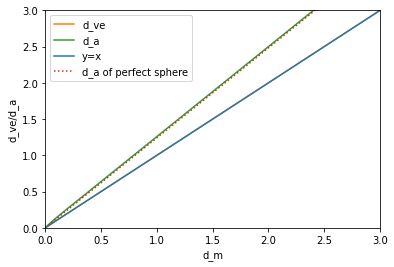

In [13]:
ax = df_dve.plot('d_m', 'd_ve', color='C1', legend='d_ve')
df_da.plot('d_m', 'd_a', color='C2', legend='d_a', ax=ax)
plt.plot([0, 3], [0,3], label='y=x')
plt.plot([0, 3], [0, 3*np.sqrt(rho)], color='C3', label='d_a of perfect sphere', ls=':')
plt.legend()
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.ylabel('d_ve/d_a')